# THE SPARKS FOUNDATION: DATA SCIENCE AND BUSINESS ANALYTICS

## Task 1: Prediction using Supervised ML

## AIM: Predict the percentage of a student based on the number of study hours.

**Type:** Simple linear regression using two varriables

**Language used:** Python

**IDE:** Jupyter Notebook

**Dataset:** [ http://bit.ly/w-data ](https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv)

## Author: Prince Raj

**Steps to be followed :**

1. Importing required packages
2. Importing & reading dataset
3. Visualize and analyze the data
4. Training the Model
5. Predicting & Comparing percentage marks
6. Evaluating the model


## Step 1 : Importing required packages


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import sys

## Step 2 : Importing & reading dataset

In [2]:
# Importing the data

student_data = pd.read_csv("/Users/anjali/jupyter_projects/s_data.csv")
print ("Dataset Imported Successfully")

Dataset Imported Successfully


In [3]:
# reading the data

student_data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
student_data.shape

# shows shape of data i.e., number or rows and coloumns in dataset

(25, 2)

In [5]:
student_data.describe()

# describe different perspective of data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [6]:
# checking if there is a null value in data because that can affect the training of algorithm

student_data.isnull == True

False

There is no null value in the Dataset so, we can now visualize and analyze the data.

## Step 3 : Visualize and analyze the data

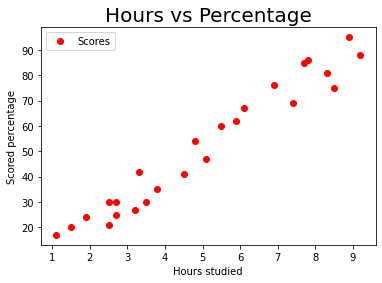

In [7]:
# Plotting the distribution of scores and number hours studied on a 2D graph

student_data.plot(x='Hours', y='Scores', style='ro')
plt.title('Hours vs Percentage', size=20)
plt.xlabel('Hours studied')
plt.ylabel('Scored percentage')
plt.show()

From the above scatter plot there looks to be correlation between the 'Scored percentage' and 'Hours studied', Lets plot a regression line to confirm the correlation.

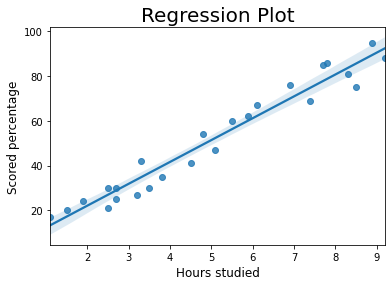

           Hours    Scores
Hours   1.000000  0.976191
Scores  0.976191  1.000000


In [8]:
# Plotting the regression line

sns.regplot(x= student_data['Hours'], y= student_data['Scores'])
plt.title('Regression Plot',size=20)
plt.xlabel('Hours studied', size=12)
plt.ylabel('Scored percentage', size=12)

plt.show()
print(student_data.corr())

It is confirmed that the variables are positively correlated i.e., there is a positive linear realtionship between hours and percentage. 

As the number of hours of studied increased, the percentage scored also increased.

## Step 4 : Training the Model

**1) Splitting the data**

In [9]:
# Defining X and y from the Data
X = student_data.iloc[:, :-1].values  
y = student_data.iloc[:, 1].values

# Spliting the Data in two
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

**2) Fitting the data into Model**

In [10]:
regression = LinearRegression()
regression.fit(train_X, train_y)
print("Model Trained Successfully")

Model Trained Successfully


## Step 5 : Predicting & Comparing percentage marks

In [11]:
# Predicting the percentage of marks

pred_y = regression.predict(val_X)
prediction = pd.DataFrame({'Hours': [i[0] for i in val_X], 'Predicted Marks': [k for k in pred_y]})
prediction

,Hours,Predicted Marks
0,1.5,16.844722
1,3.2,33.745575
2,7.4,75.500624
3,2.5,26.786400
4,5.9,60.588106
5,3.8,39.710582
6,1.9,20.821393


In [12]:
# Comparing the predicted marks with the actual marks

compare_scores = pd.DataFrame({'Actual Marks': val_y, 'Predicted Marks': pred_y})
compare_scores

,Actual Marks,Predicted Marks
0,20,16.844722
1,27,33.745575
2,69,75.500624
3,30,26.786400
4,62,60.588106
5,35,39.710582
6,24,20.821393


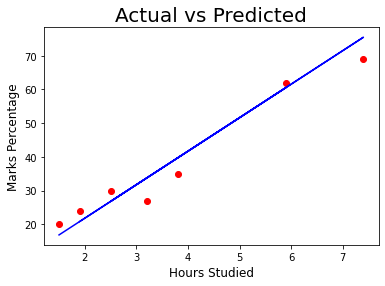

In [13]:
# Visually comparing predicted marks with actual marks

plt.scatter(x=val_X, y=val_y, color='red')
plt.plot(val_X, pred_y, color='Blue')
plt.title('Actual vs Predicted', size=20)
plt.ylabel('Marks Percentage', size=12)
plt.xlabel('Hours Studied', size=12)
plt.show()

## Step 6 : Evaluating the model

In [14]:
# Calculating the accuracy of the model

# Mean Absolute Error
print('Mean absolute error: ',mean_absolute_error(val_y,pred_y))

Mean absolute error:  4.130879918502482


In [15]:
# Max Error
print('Max error :', metrics.max_error(val_y, pred_y))

Max error : 6.74557493951356


Small value of Mean absolute error states that the chances of error are very less.

## Question : What will be the predicted score of a student studies for 9.25 hrs/day ?

In [16]:
hours = [9.25]
answer = regression.predict([hours])
print("Score = {}".format(round(answer[0],3)))

Score = 93.893


**Ans :** According to the regression model the predicted score of a student studies for 9.25 hrs/day is **93.89**.